## Datos de la entrega

** Número de Grupo:**

**Integrantes** , Nombre y Cédula

## Preparación del entorno

In [1]:
%matplotlib inline

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import sklearn

import pandas as pd


1- Si el entorno está correctamente instalado, las líneas de código anteriores deben importar los paquetes 
sin ningún error.

2- El primer comando *%matplotlib inline*  habilita gráficos que se desplegarán en el propio notebook.

3- Para el resto de las preguntas y soluciones de código, se puede definir  más celdas si se considera necesario.


## Carga y estudio de datos

Cargue los datos desde el archivo *permisos_construccion.csv*. Para esto puede utilizar la librería *pandas* con su función *read_csv*. Imprima cantidad de filas y columnas del *dataframe* resultante

In [3]:
df = pd.read_csv('permisos_construccion_ccz.csv',sep=';')
cantidadColumnasOriginal = len(df.columns);
cantidadFilasOriginal = len(df.index);
print "Columnas: "+ str(cantidadColumnasOriginal)
print "Filas: "+ str(cantidadFilasOriginal)


Columnas: 11
Filas: 29569


Para los atributos numéricos despliegue un cuadro resumen con datos generales como cantidad de instancias, media, desviación estándar, etc., utilizando la biblioteca *pandas*

In [4]:
df.describe()

,padron,puerta,anio,mes,CCZ
count,29569.000000,29548.000000,29569.000000,29569.000000,29433.000000
mean,136075.942812,2906.050596,2006.533261,7.284859,6.991506
std,122889.668995,1821.604538,4.931880,3.264078,4.094900
min,2.000000,1.000000,1997.000000,1.000000,1.000000
25%,46309.000000,1518.750000,2003.000000,5.000000,4.000000
50%,109177.000000,2388.000000,2007.000000,7.000000,7.000000
75%,170020.000000,3811.000000,2011.000000,10.000000,8.000000
max,952223.000000,11389.000000,2015.000000,12.000000,18.000000


Analice los datos desplegados. Comente sobre los siguientes puntos:
* Algunos atributos considerados numéricos son en realidad categoriales, entonces las medidas desplegadas no tienen sentido.
* Algunos atributos tienen valores faltantes, **count** nos informa de ello. ¿Es esto un problema? ¿Qué se puede hacer con los valores faltantes?
* ¿Cómo podemos detectar valores atípicos, fuera de rango,(*outliers*) con chance de ser errores? ¿Qué hacer con ellos?

Respuesta:

Indique cuales son los atributos categoriales y despliegue el conjunto de valores posibles para cada uno de ellos.

In [5]:
print "Son atributos categoriales el CCZ, Mes."

Son atributos categoriales el CCZ, Mes.


In [6]:
print "Mes: 1-12" 
np.unique(df['mes'].values)

Mes: 1-12


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
print "CCZ: 1-18"
np.unique(df['CCZ'].values)

CCZ: 1-18


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

### Atributos Faltantes
Faltan valores con atributos puerta y CCZ, si estos atributos van a ser usados para la clasificacion o comparaciones ésto puede ser un problema. Se podría intentar rellenar esos campos utilizando otra información del registro, en el caso del CCZ para completarlo se podría utilizar la dirección. En el caso de la puerta como falta también la dirección se obtendrá según el padrón asociado. Si hay más de una dirección se tomará una de ellas.

### Outliers
Cuando se sabe a qué entidad de la realidad corresponde un atributo y el contexto de los datos se pueden validar los valores para buscar errores, como por ejemplo un número de puerta fraccionado, el minimo y maximo de los atributos categoriales, el minimo y maximo del año.

Elimine los permisos con datos faltantes. ¿Cuántos son?

In [8]:
df = df[df.puerta.notnull()]
df = df[df.CCZ.notnull()]
print "Cantidad de permisos con datos faltantes: "+ str(cantidadFilasOriginal - len(df.index))

Cantidad de permisos con datos faltantes: 136


Imprima un resumen de sus datos, mostrando los nombres de las atributos y las 1eras y últimas filas

In [9]:
df

,padron,destino,area,calle,puerta,letra,anio,mes,expediente,tipo_obra,CCZ
0,2640,Comercio ...,"13,7",PIEDRAS ...,234,,2007,2,4113-017964-06 ...,Obra Nueva ...,1
1,2640,Comercio ...,190,PIEDRAS ...,234,,2007,2,4113-017964-06 ...,Reforma ...,1
2,2640,Comercio ...,230,PIEDRAS ...,234,,2007,2,4113-017964-06 ...,Regularizacion - A̱o ...,1
3,3862,Comercio ...,3333,BUENOS AIRES ...,332,,2010,11,4113-013613-09 ...,Obra Nueva ...,1
4,4173,Otros ...,3602,SARANDI ...,468,,2005,12,4113-016255-05 ...,Reforma ...,1
5,4926,Otros ...,1100,PAYSANDU ...,833,,2007,11,4113-021229-99 ...,Regularizacion - A̱o ...,1
6,4937,Vivienda ...,46,CERRO LARGO ...,806,,2007,7,4113-009783-07 ...,Obra Nueva ...,1
7,4937,Vivienda ...,50,CERRO LARGO ...,806,,2007,7,4113-009783-07 ...,Reforma ...,1
8,4937,Vivienda ...,67,CERRO LARGO ...,806,,2007,7,4113-009783-07 ...,Regularizacion - A̱o ...,1
9,4991,Comercio ...,"135,9",ANDES ...,1437,,2006,7,4113-006957-06 ...,Obra Nueva ...,1


**PREGUNTA:** Realice algunas conjeturas respecto a cuáles atributos están relacionados entre sí. ¿Cuáles atributos podrán ser útiles para predecir el destino de la obra? ¿Cuáles atributos eliminaría?

**RESPUESTA:**

Los datos calle, puerta, letra y CCZ tienen relación entre sí, dado que refieren a la ubicación geografica de la obra. Los datos puerta y letra por su naturaleza no parecen tener ninguna relevancia a la hora de definir el destino de la obra, la calle por si misma tampoco pare tener relevancia, sin embargo puede suceder que en calles de importancia se de mayor frecuencia de cierto destino de obras por sobre otras. La misma observación se puede realizar sobre el atributo CCZ.

Ni el expediente, ni el padrón parecen tener relación entre sí ni con otro campo ni relevancia a la hora de determinar el destino de la obra.

El año y el mes tampoco parecen relevantes aunque puede haber alguna distribución de datos en el tiempo que sea de interés.

El tipo de obra puede tener relación con el área y ambos atributos pueden ser importantes para determinar el destino de la obra.

Eliminariamos Puerta, Letra, Expediente y Padrón del conjunto de atributos.


Grafique en diagrama de barras alguna variable categorial, p.ej, cantidad de permisos por CCZ.

In [10]:
df.destino.values

array(['Comercio                                          ',
       'Comercio                                          ',
       'Comercio                                          ', ...,
       'Industria                                         ',
       'Comercio                                          ',
       'Comercio                                          '], dtype=object)

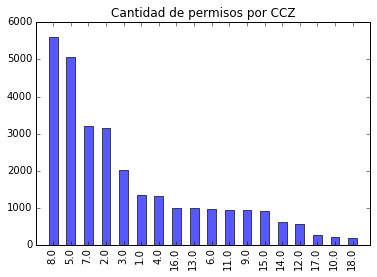

In [11]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.CCZ.value_counts().plot(kind='bar', color="blue", alpha=.65)
ax.set_xlim(-1, len(df.CCZ.value_counts())) 
plt.title("Cantidad de permisos por CCZ")

In [12]:
#print np.unique(df.CCZ.values);
#print df.anio[df.CCZ == 18].value_counts()
#color=cm.rainbow(np.linspace(0,1,100))
#print color[5]

## Extracción de atributos

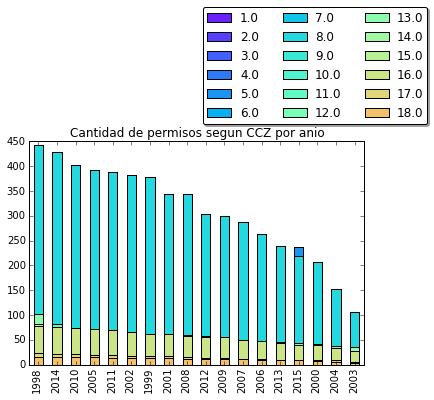

In [13]:
# Step 2
from matplotlib.pyplot import cm
ax2 = fig.add_subplot(346)
color=cm.rainbow(np.linspace(0,1,100))
for i in np.unique(df.CCZ.values):     
    #c=next(color))
    df.anio[df.CCZ == i].value_counts().plot(kind='bar', color=color[i+i*3.0],label=i)
ax2.set_xlim(1, 20)
ax2.set_ylim(1, 20)

plt.legend(loc='best', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title("Cantidad de permisos segun CCZ por anio"); 
#plt.legend(loc='best')
#plt.legend(loc='lower right')
plt.show()


Generar un array **y** a partir de la columna **destino** . Es un atributo binario que vale 1 si el destino es 'Vivienda' y 0 en caso contrario.**y** es la clase a predecir a partir de datos de entrada

In [14]:
def destinoBool(a):
    if (a.strip() == 'Vivienda'):
        return 1
    else: 
        return 0
y = map(destinoBool,df.destino.values);

Eliminar las columnas que considere irrelevantes.  Eliminar la columna **destino** ya que es la columna que contiene la clase que se pretende predecir:

In [15]:
df = df.drop('puerta',1)
df = df.drop('letra',1)
df = df.drop('expediente',1)
df = df.drop('padron',1)
df = df.drop('destino',1)

 Los atributos cuyos valores son categorías ( 'tipo de obra' y 'CCZ') deben transformarse a valores numéricos para poder ser utilizados como entradas en los modelos de scikit-learn. 

In [16]:
from sklearn import preprocessing

tipo_enc = preprocessing.LabelEncoder();
tipo_label_encoder = tipo_enc.fit(df.tipo_obra.values)
print "Clases categoriales: ",tipo_label_encoder.classes_
integer_classes = tipo_label_encoder.transform(tipo_label_encoder.classes_).reshape(13, 1)
print "Clases enteros:", integer_classes
tipo_enc = preprocessing.OneHotEncoder()
tipo_one_hot_encoder = tipo_enc.fit(integer_classes)
# Primero, convertir las clases a 0-(N-1) enteros usando label_encoder
num_of_rows = len(df.tipo_obra)
t = tipo_label_encoder.transform(df.tipo_obra.values).reshape(num_of_rows, 1)
# Despues, crear matriz con N columnas, cada una indicando si la instancia pertenece a la clase
tipos = tipo_one_hot_encoder.transform(t)
tipos_names = [x[:4] for x in tipo_label_encoder.classes_]
print "Nombres columnas ", tipos_names
print "Matriz de tipos ", tipos.toarray()

# Agregar columnas a X
X_nom = tipos_names
X = np.concatenate([tipos.toarray()], axis = 1)
X.shape

Clases categoriales:  ['Ampliacion                                        '
 'Demolicion                                        '
 'Estacionamiento                                   '
 'Galpon                                            '
 'Incorporacion A.P.H.                              '
 'Marquesina                                        '
 'Modificacion en Obra                              '
 'Obra Nueva                                        '
 'Pilotaje                                          '
 'Reciclaje                                         '
 'Reforma                                           '
 'Regularizacion - A\xcc\xb1o                              '
 'Toldo                                             ']
Clases enteros: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
Nombres columnas  ['Ampl', 'Demo', 'Esta', 'Galp', 'Inco', 'Marq', 'Modi', 'Obra', 'Pilo', 'Reci', 'Refo', 'Regu', 'Told']
Matriz de tipos  [[ 0.  0.  0. ...,  0.  0.  0.]
 

(29433, 13)

In [17]:
ccz_enc = preprocessing.LabelEncoder();
ccz_label_encoder = ccz_enc.fit(df.CCZ.values)
print "Clases categoriales: ",ccz_label_encoder.classes_
ccz_integer_classes = ccz_label_encoder.transform(ccz_label_encoder.classes_).reshape(18, 1)
print "Clases enteros:", ccz_integer_classes
ccz_enc = preprocessing.OneHotEncoder()
ccz_one_hot_encoder = ccz_enc.fit(ccz_integer_classes)
# Primero, convertir las clases a 0-(N-1) enteros usando label_encoder
ccz_num_of_rows = len(df.CCZ)
ccz_t = ccz_label_encoder.transform(df.CCZ.values).reshape(ccz_num_of_rows, 1)
# Despues, crear matriz con N columnas, cada una indicando si la instancia pertenece a la clase
ccz = ccz_one_hot_encoder.transform(ccz_t)
ccz_names = ['CCZ'+str(int(x)) for x in ccz_label_encoder.classes_]
print "Nombres columnas ", ccz_names
print "Matriz de ccz ", ccz.toarray()

# Agregar columnas a X
X_nom = np.concatenate((X_nom,ccz_names), axis=0)
X = np.concatenate([X,ccz.toarray()], axis = 1)
X.shape

Clases categoriales:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.]
Clases enteros: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
Nombres columnas  ['CCZ1', 'CCZ2', 'CCZ3', 'CCZ4', 'CCZ5', 'CCZ6', 'CCZ7', 'CCZ8', 'CCZ9', 'CCZ10', 'CCZ11', 'CCZ12', 'CCZ13', 'CCZ14', 'CCZ15', 'CCZ16', 'CCZ17', 'CCZ18']
Matriz de ccz  [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


(29433, 31)

In [18]:
le_anio = preprocessing.LabelEncoder()
anio = le_anio.fit_transform(df.anio)

le_mes = preprocessing.LabelEncoder()
mes = le_mes.fit_transform(df.mes)

le_area = preprocessing.LabelEncoder()
area = le_area.fit_transform(df.area)

Y = np.concatenate([[anio],[mes],[area]],axis=0)
Y.shape

# Agregar columnas a X
X_nom = np.concatenate((X_nom,['anio','mes','area']), axis=0)
X = np.concatenate([X,Y.T], axis = 1)
print "dimensiones: ", X.shape
print "Columnas: ",X_nom

dimensiones:  (29433, 34)
Columnas:  ['Ampl' 'Demo' 'Esta' 'Galp' 'Inco' 'Marq' 'Modi' 'Obra' 'Pilo' 'Reci'
 'Refo' 'Regu' 'Told' 'CCZ1' 'CCZ2' 'CCZ3' 'CCZ4' 'CCZ5' 'CCZ6' 'CCZ7'
 'CCZ8' 'CCZ9' 'CCZ10' 'CCZ11' 'CCZ12' 'CCZ13' 'CCZ14' 'CCZ15' 'CCZ16'
 'CCZ17' 'CCZ18' 'anio' 'mes' 'area']


**PREGUNTA: Por qué no es apropiado transformar un atributo de categoría en simples índices numéricos?**

**RESPUESTA: **
La estandarización de datos es un requisito en la mayoría de los algoritmos de SciKit por lo que se podrían comportar de forma extraña si los datos no están distribuidos normalmente (Dist. Gaussiana) con media cero y varianza 1.

Además en el caso de aributos categoriales si se usara una representación entera los algoritmos de SciKit podrían interpetar que hay cierto orden en los datos asi como el orden de la representación y eso no siempre es cierto. En el caso de tipo de obra, claramente no lo es.

http://scikit-learn.org/stable/modules/preprocessing.html#label-encoding

Utilice las clases *LabelEncoder* y *OneHotEncoder* del paquete *preprocessing* de *sklearn* para transformar los atributos de categorías en atributos numéricos. Guarde los datos de entrada en una matriz **X**.

**PREGUNTA**: ¿ Cuántos y cuáles son los nuevos atributos del dataset ? Muestre primeras y últimas filas.

**RESPUESTA:**

In [19]:
print "Atributos: ", X_nom
print "Matriz: ", X
print "Dimensiones: ",X.shape

Atributos:  ['Ampl' 'Demo' 'Esta' 'Galp' 'Inco' 'Marq' 'Modi' 'Obra' 'Pilo' 'Reci'
 'Refo' 'Regu' 'Told' 'CCZ1' 'CCZ2' 'CCZ3' 'CCZ4' 'CCZ5' 'CCZ6' 'CCZ7'
 'CCZ8' 'CCZ9' 'CCZ10' 'CCZ11' 'CCZ12' 'CCZ13' 'CCZ14' 'CCZ15' 'CCZ16'
 'CCZ17' 'CCZ18' 'anio' 'mes' 'area']
Matriz:  [[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00000000e+01
    1.00000000e+00   1.30100000e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00000000e+01
    1.00000000e+00   3.14000000e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00000000e+01
    1.00000000e+00   4.12500000e+03]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.70000000e+01
    6.00000000e+00   4.94000000e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.40000000e+01
    1.10000000e+01   4.75800000e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.60000000e+01
    1.10000000e+01   3.26400000e+03]]
Dimensiones:  (29433, 34)


## Partición de datos

Para poder entrenar y testear un algoritmo de aprendizaje, es necesario primero particionar los datos en dos conjuntos disjuntos de entrenamiento y testeo. Separe aleatoriamente un 25% de los datos para testeo, llame a los atributos de entrada como **X_test** y al vector de salida esperado **y_test**. El 75% restante se utilizará para el entrenamiento, nombre a la matriz con los datos de entrada como **X_train** y al vector de salida correspondiente como **y_train**.
Para esto puede utilizar la función *train_test_split* del paquete *cross_validation* de *sklearn*:

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

Examine el tamaño de las matrices y vectores generados:

In [21]:
print "Dimensiones X_train: ", X_train.shape
print "Dimensiones X_test: ", X_test.shape
print "Dimensiones y_train: ", len(y_train)
print "Dimensiones y_test: ", len(y_test)

Dimensiones X_train:  (22074, 34)
Dimensiones X_test:  (7359, 34)
Dimensiones y_train:  22074
Dimensiones y_test:  7359


## Entrenamiento

Ahora que tenemos particionados los datos en entrenamiento y testeo, podemos comenzar a entrenar los algoritmos.

Genere un modelo 'dt' entrenando un algoritmo de árboles de decisión (ver el paquete *tree* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [36]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

Genere un modelo 'nb' entrenando un algoritmo de Naive Bayes (ver el paquete *naive_bayes* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train,y_train)

Genere un modelo 'svc' entrenando un algoritmo de Support Vector Machines (ver el paquete *svm* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [60]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC()
svc = svc.fit(X_train,y_train) 

## Testing

Luego de tener los modelos entrenados, podemos medir qué tan bien funcionan los modelos (su capacidad de predicción) utlizando medidas standard como accuracy, precision, recall y medida-f.

**PREGUNTA: De la definición de cada una de las medidas de perfomance (accuracy, precision, recall y medida-f)**

**RESPUESTA:**

Implemente una función 'imprimir_performance' que dado un vector de entrada 'X', un vector de salida 'y', y un clasificador 'clf':
- Realice la predicción para el vector de entrada X.
- Imprima la medida de accuracy.
- Imprima precision, recall y medida f de cada clase.
- Imprima la matriz de confusión.

Para esto puede utilizar el paquete *metrics* de *sklearn*.

In [25]:
from sklearn import metrics
def imprimir_performance(X,y,clf):
    y_pred=clf.predict(X)   
    print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"
    print "Classification report"
    print metrics.classification_report(y,y_pred),"\n"
    print "Confusion matrix"
    print metrics.confusion_matrix(y,y_pred),"\n"

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **dt** basado en árboles de decisión:

In [38]:
imprimir_performance(X_test,y_test,dt)

Accuracy:0.668 

Classification report
             precision    recall  f1-score   support

          0       0.43      0.42      0.43      2147
          1       0.76      0.77      0.77      5212

avg / total       0.67      0.67      0.67      7359


Confusion matrix
[[ 904 1243]
 [1202 4010]] 



Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **nb** basado en Naive Bayes:

In [27]:
imprimir_performance(X_test,y_test,nb)

Accuracy:0.704 

Classification report
             precision    recall  f1-score   support

          0       0.49      0.37      0.42      2147
          1       0.77      0.84      0.80      5212

avg / total       0.68      0.70      0.69      7359


Confusion matrix
[[ 803 1344]
 [ 835 4377]] 



Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **svc** basado en Support Vector Machines:

In [61]:
imprimir_performance(X_test,y_test,svc)

Accuracy:0.715 

Classification report
             precision    recall  f1-score   support

          0       0.70      0.04      0.08      2147
          1       0.72      0.99      0.83      5212

avg / total       0.71      0.72      0.61      7359


Confusion matrix
[[  89 2058]
 [  39 5173]] 



**PREGUNTA: Realice un breve análisis de los resultados obtenidos.**

**RESPUESTA:**

## Validación cruzada

Entrene y mida la perfomance de los clasificadores anteriores, pero ahora utilizando el algoritmo de validación cruzada (cross validation) tomando 5 particiones. Imprima el promedio de accuracy obtenido para cada modelo:

In [29]:
from sklearn.cross_validation import KFold

In [30]:
kf = KFold(X.shape[0], n_folds=5)
for train, test in kf:
    print("%s %s" % (train, test))

[ 5887  5888  5889 ..., 29430 29431 29432] [   0    1    2 ..., 5884 5885 5886]
[    0     1     2 ..., 29430 29431 29432] [ 5887  5888  5889 ..., 11771 11772 11773]
[    0     1     2 ..., 29430 29431 29432] [11774 11775 11776 ..., 17658 17659 17660]
[    0     1     2 ..., 29430 29431 29432] [17661 17662 17663 ..., 23544 23545 23546]
[    0     1     2 ..., 23544 23545 23546] [23547 23548 23549 ..., 29430 29431 29432]


Validación cruzada árbol de decisión

In [74]:
from sklearn import tree,cross_validation
dt = tree.DecisionTreeClassifier()

dt_score = cross_validation.cross_val_score(dt, X, y, cv=kf, n_jobs=-1)
print "Media Decision Tree Cross Validation: ",dt_score.mean()

Media Decision Tree Cross Validation:  0.614583825024


Validación cruzada Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb_score = cross_validation.cross_val_score(nb, X, y, cv=kf, n_jobs=-1)
print "Media Naive Bayes Cross Validation: ",nb_score.mean()

Media Naive Bayes Cross Validation:  0.711957831261


Validación cruzada SVM

In [89]:
from sklearn.svm import SVC,LinearSVC,NuSVC
svc = LinearSVC()

svc_score = cross_validation.cross_val_score(svc, X, y, cv=kf, n_jobs=-1)
print "Media SVM Cross Validation: ",svc_score.mean()

Media SVM Cross Validation:  0.478847320539


**PREGUNTA: Describa brevemente cuáles son las ventajas de utilizar validación cruzada en vez de realizar una único esquema de partición como se hizo al principio.**

**RESPUESTA:**

## Mejorando los resultados

Existen varias técnicas que pueden ser utilizadas para mejorar los resultados de nuestros modelos. A continuación utilizaremos técnias de **selección de atributos** y de **ajuste de hiperparámetros**.

## Selección de atributos

En nuestros entrenamientos hemos utilizado todos los atributos disponibles para entrenar nuestros modelos. Pero no siempre esto lleva a los mejores resultados, de hecho muchas veces, trabajar con un conjunto reducido de atributos devuelve mejores resultados.

**PREGUNTA: Investigue de qué se trata la técnica de selección de atributos (feature selection) y argumente brevemente por qué puede mejorar la performance de un algoritmo de aprendizaje automático.**

**RESPUESTA:**

La selección de atributos es el proceso de seleccionar un subconjunto de atributos del modelo de entrenamiento con el objetivo de simplificar los modelos, acortar los tiempos de entrenamiento y favorecer la generalización por sobre la sobreestimación partiendo de la base de que los datos contienen información irrelevante o redundante que puede ser eliminada sin perder precisión.

Utilizando el paquete *feature_selection* de *sklearn*, seleccione e imprima la lista de los 10 mejores atributos según la medida estadística chi^2:

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##Definimos una funcion que selecciona los n atributos mejores y devuelve la matrix X
##transformada para mantener dichos atributos y una lista de los nombres de estos.
def seleccionarKmejores(X,X_nom,y,n):
    attr = []
    #Seleccionamos los 10 mejores
    featureSelector = SelectKBest(chi2, k=n)
    featureSelector.fit(X, y)
    #Obtenemos los indices para imprimir cuales son
    indices = list(featureSelector.get_support(indices=True))
    for index in indices:
        attr.append(X_nom[index]) 
    #En X_new quedan los mejores 10 atributos
    X_new  = featureSelector.transform(X)
    #Verifico dimensiones
    #print X_new.shape
    return (X_new,attr)

In [100]:
##Evaluamos con cross validation la nueva matriz.
mejores = seleccionarKmejores(X,X_nom,y,10)
X_new = mejores[0]
print mejores[1]

#Veo performance
dt10 = tree.DecisionTreeClassifier()
dt_score10 = cross_validation.cross_val_score(dt10, X_new, y, cv=kf, n_jobs=-1)
print "Media Decision Tree Cross Validation: ",dt_score10.mean()
nb10 = GaussianNB()
nb_score10 = cross_validation.cross_val_score(nb10, X_new, y, cv=kf, n_jobs=-1)
print "Media Naive Bayes Cross Validation: ",nb_score10.mean()
svc10 = LinearSVC()
svc_score10 = cross_validation.cross_val_score(svc10, X_new, y, cv=kf, n_jobs=-1)
print "Media SVM Cross Validation: ",svc_score10.mean()

(29433, 10)
['CCZ1', 'CCZ2', 'CCZ5', 'CCZ7', 'CCZ8', 'CCZ9', 'CCZ10', 'CCZ18', 'anio', 'area']
Media Decision Tree Cross Validation:  0.63530857887
Media Naive Bayes Cross Validation:  0.717801434318
Media SVM Cross Validation:  0.493934890315


Intente obtener la lista de los mejores N atributos, donde N sea la cantidad mínima posible de atributos que mantenga o mejore las medidas de performance obtenidas con validación cruzada:

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##Devuelve true si la cantidad de atributos n mejora o iguala la performance obtenida en la validacion cruzada
##para la matrix X original
def esmejor(X,X_nom,y,n):
    (X_new,attrs) = seleccionarKmejores(X,X_nom,y,n)
    dt_new = cross_validation.cross_val_score(dt, X_new, y, cv=kf, n_jobs=-1)
    print "DT ",dt_score.mean(),dt_new.mean()
    if dt_score.mean() > dt_new.mean():
        return (False,attrs)
           
    nb_new = cross_validation.cross_val_score(nb, X_new, y, cv=kf, n_jobs=-1)
    print "NB ",nb_score.mean(),nb_new.mean()
    if nb_score.mean() > nb_new.mean():
        return (False,attrs)
        
    svc_new = cross_validation.cross_val_score(svc, X_new, y, cv=kf, n_jobs=-1)
    print "SVC ",svc_score.mean(),svc_new.mean()
    if svc_score.mean() > svc_new.mean():
        return (False,attrs)
    
    return (True,attrs)

##Evaluo todo los posibles valores hasta que alguno mejore o iguale.
for i in range(1, X.shape[1]):
    mejor = esmejor(X,X_nom,y,i)
    print mejor
    if mejor[0]: 
        print "La cantidad minima de atributos que mantiene o mejora la performance es: ",len(mejor[1])
        print mejor[1]
        break

(29433, 1)
DT  0.614583825024 0.716442276996
NB  0.711957831261 0.716442276996
SVC  0.478847320539 0.716442276996
(True, ['CCZ1'])
La cantidad minima de atributos que mantiene o mejora la performance es:  1
['CCZ1']


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 


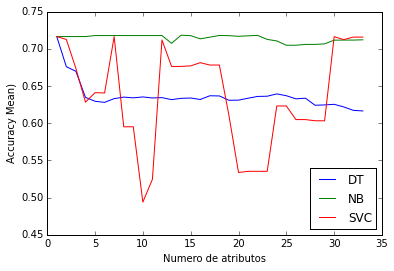

In [105]:
from sklearn import cross_validation
import pylab as pl

#grafico la media de los scores de cada algoritmo vs el numero de atributos
def nMejorGrafica(X,y):
    #rango de 1 a cant atributos
    rango = range(1, X.shape[1])
    results = [[],[],[],[]]
    #para cada n
    for i in rango:
        (X_new,attrs) = seleccionarKmejores(X,X_nom,y,i)
        #Evaluo los algoritmos con validacion cruzada
        dt_new = cross_validation.cross_val_score(dt, X_new, y, cv=kf, n_jobs=-1)
        nb_new = cross_validation.cross_val_score(nb, X_new, y, cv=kf, n_jobs=-1)
        svc_new = cross_validation.cross_val_score(svc, X_new, y, cv=kf, n_jobs=-1)

        #Guardo resultado
        results[0] = np.append(results[0], dt_new.mean())
        results[1] = np.append(results[1], nb_new.mean())
        results[2] = np.append(results[2], svc_new.mean())
        results[3] = attrs
        print (i),

    print ""

    # Plot number of features VS. cross-validation scores

    pl.figure()
    pl.xlabel("Numero de atributos")
    pl.ylabel("Accuracy Mean)")
    pl.plot(rango,results[0])
    pl.plot(rango,results[1])
    pl.plot(rango,results[2])
    pl.legend(['DT', 'NB', 'SVC'], loc='lower right')
    #print "Medias:",results
    
nMejorGrafica(X,y)

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Seleccionamos los 1 mejores
(X_new,attrs) = seleccionarKmejores(X,X_nom,y,1)

#Veo performance
dtN = tree.DecisionTreeClassifier()
dt_scoreN = cross_validation.cross_val_score(dtN, X_new, y, cv=kf, n_jobs=-1)
print "Media Decision Tree Cross Validation: ",dt_scoreN.mean()
nbN = GaussianNB()
nb_scoreN = cross_validation.cross_val_score(nbN, X_new, y, cv=kf, n_jobs=-1)
print "Media Naive Bayes Cross Validation: ",nb_scoreN.mean()
svcN = LinearSVC()
svc_scoreN = cross_validation.cross_val_score(svcN, X_new, y, cv=kf, n_jobs=-1)
print "Media SVM Cross Validation: ",svc_scoreN.mean()

CCZ1
(29433, 1)
Media Decision Tree Cross Validation:  0.716442276996
Media Naive Bayes Cross Validation:  0.716442276996
Media SVM Cross Validation:  0.716442276996


Con el conjunto de atributos obtenido, entrene los clasificadores nuevamente y verifique que las medidas de precision, recall mejoran en general:

**PREGUNTA: Escriba las conclusiones generales que haya obtenido de la tarea.**

**RESPUESTA:**